In [1]:
import json 
import networkx as nx
  
from graph_functions.erdos_renyi_dag import er_dag
from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.approximate_speeds import *
from iterative_heuristic.consolidated import *
from makespan_energy.construct_graph_util import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 
import random

In [3]:
task_sizes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
repetitions = 5
x = [element for element in task_sizes for _ in range(repetitions)]
machine_scaling = []
task_scaling = []

In [4]:
for task in task_sizes:
    print("Task size is ", task)
    for current in range(repetitions):
        print("repetition is ", current)
        seed = current+task
        print("seed is ",seed)
        dag = er_dag(task, 0.15,seed, False)
        w = [1]*task
        s = [1 for i in range(task)]
        tie_breaking_rule = 2
        num_machines=3
        # Get ordering using modified ETF
        test = Mod_ETF(dag, w, s, num_machines, tie_breaking_rule, plot=False)
        temp = get_objective_single_ordering(True, dag, w, test.order, plot=False, compare=True)
        obj_task,  obj_machine = temp['objective_task_scaling'], temp['objective_machine_scaling']
        print("objectives are: ",obj_task, obj_machine)
        task_scaling.append(obj_task)
        machine_scaling.append(obj_machine)
        
    

Task size is  5
repetition is  0
seed is  5
objectives are:  11.65685 11.79796
repetition is  1
seed is  6
objectives are:  13.12096 13.38426
repetition is  2
seed is  7
objectives are:  11.65685 11.79796
repetition is  3
seed is  8
objectives are:  13.15298 13.41641
repetition is  4
seed is  9
objectives are:  11.65685 11.79796
Task size is  10
repetition is  0
seed is  10
objectives are:  28.87759 29.61967
repetition is  1
seed is  11
objectives are:  28.8968 29.65129
repetition is  2
seed is  12
objectives are:  28.8968 29.65129
repetition is  3
seed is  13
objectives are:  28.87759 29.61967
repetition is  4
seed is  14
objectives are:  29.41348 30.1972
Task size is  15
repetition is  0
seed is  15
objectives are:  50.29399 51.96152
repetition is  1
seed is  16
objectives are:  50.29399 51.96152
repetition is  2
seed is  17
objectives are:  50.29399 51.96152
repetition is  3
seed is  18
objectives are:  50.29399 51.96152
repetition is  4
seed is  19
objectives are:  50.29399 51.9615

In [26]:
print(task_scaling)
print(machine_scaling)
print(len(task_scaling))
print(len(machine_scaling))

[11.65685, 13.12096, 11.65685, 13.15298, 11.65685, 28.87759, 28.8968, 28.8968, 28.87759, 29.41348, 50.29399, 50.29399, 50.29399, 50.29399, 50.29399, 75.62357, 75.93929, 75.62867, 76.10984, 75.58181, 103.836, 104.26954, 134.80967, 137.75802, 137.00148, 169.66561, 168.59324, 171.26858, 171.90386, 210.83768, 211.01873, 205.70544, 211.13269, 258.817, 249.74089, 243.9231, 245.50224, 247.7974, 287.33679, 283.38941, 290.81743, 292.734]
[11.79796, 13.38426, 11.79796, 13.41641, 11.79796, 29.61967, 29.65129, 29.65129, 29.61967, 30.1972, 51.96152, 51.96152, 51.96152, 51.96152, 51.96152, 78.47772, 78.84101, 78.48567, 78.94773, 78.48567, 108.13147, 109.768, 140.71247, 143.65125, 143.65125, 180.22208, 176.2952, 179.44358, 183.64251, 224.66271, 228.99336, 219.36824, 222.35107, 279.82137, 270.33312, 258.41826, 257.0214, 271.21999, 302.65491, 297.32137, 318.50818, 313.36879]
42
42


In [25]:
index = task_scaling.index(0)
task_scaling.pop(index)
machine_scaling.pop(index)
x.pop(index)

25

In [27]:
ratios = [m/t for m,t in zip(machine_scaling, task_scaling)]

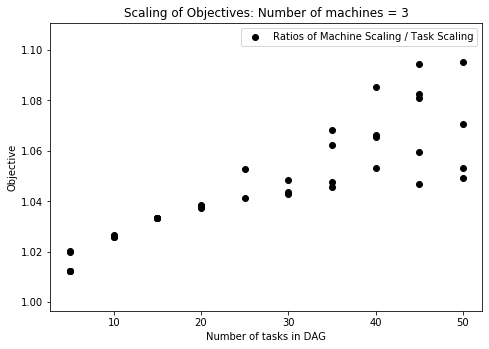

In [28]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


#print(ub_ratio)
#plt.scatter(obj_lb_lst[:,0], obj_lb_lst[:,1], label='lower bound', color="g", linewidths=0.1)


# plt.scatter(x, y, s=5, label='opt/lb', color='b')
plt.scatter(x, ratios, label='Ratios of Machine Scaling / Task Scaling', color='k')
#plt.scatter(x, naives, label='Naives', color='g')
plt.xlabel('Number of tasks in DAG')
plt.ylabel('Objective')
plt.title("Scaling of ratio of Task Scaling and Machine Scaling Objectives: Number of machines = 3")
plt.legend()
plt.show()